In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix

import string
import re

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from keras.utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense , LSTM , Embedding
from keras.models import Sequential
from keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings('ignore')

import pickle

c:\Users\ASUS\anaconda3\envs\python39\lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


In [2]:
df = pd.read_csv('fresh_data.csv').drop(columns=['Unnamed: 3'])


In [3]:
df = df[df['rate'] != 3]


In [4]:
# Function to convert score to sentiment
def to_sentiment(rating):
    
    rating = int(rating)
    
    # Convert to class
    if rating <= 2:
        return 0
    else:
        return 1

# Apply to the dataset 
df['sentiment'] = df.rate.apply(to_sentiment)

Text(0.5, 0, 'review sentiment')

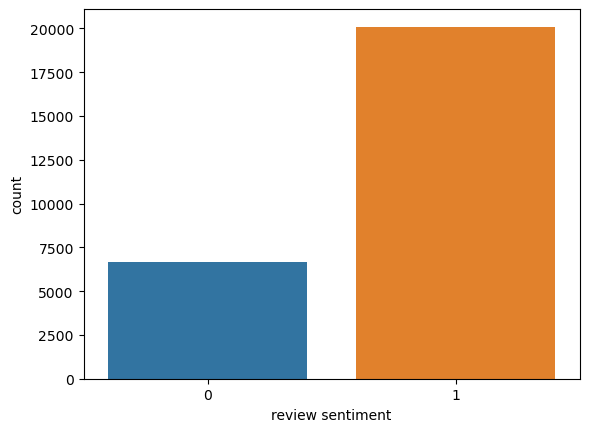

In [5]:
# # Plot the distribution
class_names = ['negative', 'positive']
'''
- Tạo 2 class: Negative n Positive
'''
sns.countplot( x='sentiment',data = df)
plt.xlabel('review sentiment')

In [6]:
from sklearn.utils import resample

df_majority = df[(df['sentiment'] == 1)]
df_minority = df[(df['sentiment'] == 0)]

df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples=20093, # to match majority class
                                 random_state=42)

df1 = pd.concat([df_minority_upsampled, df_majority])

In [7]:
X = df1['comment']
y = df1['sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    
    X, y, test_size=0.20, random_state=1,# stratify=y
    
    )

In [8]:
X_train.shape, X_test.shape


((32148,), (8038,))

### Bag of Words Vectorizer

In [9]:
bow_vectorizer = CountVectorizer(max_features=10000)
bow_vectorizer.fit(X_train)

# transform
bow_X_train = bow_vectorizer.transform(X_train)
bow_X_test = bow_vectorizer.transform(X_test)

### TF-IDF Vectorizer

In [10]:
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
tfidf_vectorizer.fit(X_train)

# transform
tfidf_X_train = tfidf_vectorizer.transform(X_train)
tfidf_X_test = tfidf_vectorizer.transform(X_test)

In [11]:
labelEncoder = LabelEncoder()

y_train = labelEncoder.fit_transform(y_train)
y_test = labelEncoder.transform(y_test)

labels = labelEncoder.classes_.tolist()
print(labels) # index-> class

[0, 1]


### Model Training

In [12]:
### 
def train_and_eval(model, trainX, trainY, testX, testY):

    # training
    _ = model.fit(trainX, trainY)

    # predictions
    y_preds_train = model.predict(trainX)
    y_preds_test = model.predict(testX)

    # evaluation
    print()
    print(model)
    print(f"Train accuracy score : {round(accuracy_score(y_train, y_preds_train),2 )}")
    print(f"Test accuracy score : {round(accuracy_score(y_test, y_preds_test),2)}")
    print('\n',40*'-')

### Logistic Regression with BoW

In [13]:
# Hyperparameters
C = [0.001, 0.01, 0.1, 1, 10]

for c in C: 
    # Define model
    log_model1 = LogisticRegression(C=c, max_iter=500, random_state=1)
    
    # Train and evaluate model
    train_and_eval(model=log_model,
                   trainX=bow_X_train,
                   trainY=y_train,
                   testX=bow_X_test,
                   testY=y_test)

NameError: name 'log_model' is not defined

### Naive Bayes Classifier with BoW

In [ ]:
alphas = [0, 0.2, 0.6, 0.8, 1]

for a  in alphas: 
    # Define model
    nb_model = MultinomialNB(alpha=a)

    # Train and evaluate model
    train_and_eval(model=nb_model,
                   trainX=bow_X_train,
                   trainY=y_train,
                   testX=bow_X_test,
                   testY=y_test)


MultinomialNB(alpha=0)
Train accuracy score : 0.89
Test accuracy score : 0.86

 ----------------------------------------

MultinomialNB(alpha=0.2)
Train accuracy score : 0.88
Test accuracy score : 0.86

 ----------------------------------------

MultinomialNB(alpha=0.6)
Train accuracy score : 0.87
Test accuracy score : 0.86

 ----------------------------------------

MultinomialNB(alpha=0.8)
Train accuracy score : 0.87
Test accuracy score : 0.86

 ----------------------------------------

MultinomialNB(alpha=1)
Train accuracy score : 0.87
Test accuracy score : 0.86

 ----------------------------------------


### Logistic Regression with Tf-Idf


In [ ]:
# Hyperparameters
C = [0.001, 0.01, 0.1, 1, 10]

for c in C: 
    # Define model
    log_model2 = LogisticRegression(C=c, max_iter=500, random_state=1)
    
    # Train and evaluate model
    train_and_eval(model=log_model,
                   trainX=tfidf_X_train,
                   trainY=y_train,
                   testX=tfidf_X_test,
                   testY=y_test)


LogisticRegression(C=10, max_iter=500, random_state=1)
Train accuracy score : 0.94
Test accuracy score : 0.92

 ----------------------------------------

LogisticRegression(C=10, max_iter=500, random_state=1)
Train accuracy score : 0.94
Test accuracy score : 0.92

 ----------------------------------------

LogisticRegression(C=10, max_iter=500, random_state=1)
Train accuracy score : 0.94
Test accuracy score : 0.92

 ----------------------------------------

LogisticRegression(C=10, max_iter=500, random_state=1)
Train accuracy score : 0.94
Test accuracy score : 0.92

 ----------------------------------------

LogisticRegression(C=10, max_iter=500, random_state=1)
Train accuracy score : 0.94
Test accuracy score : 0.92

 ----------------------------------------


### Naive Bayes classifier with Tf-Idf

In [ ]:
alphas = [0, 0.2, 0.6, 0.8, 1]

for a  in alphas: 
    # Define model
    nb_model = MultinomialNB(alpha=a)

    # Train and evaluate model
    train_and_eval(model=nb_model,
                   trainX=tfidf_X_train,
                   trainY=y_train,
                   testX=tfidf_X_test,
                   testY=y_test)


MultinomialNB(alpha=0)
Train accuracy score : 0.9
Test accuracy score : 0.87

 ----------------------------------------

MultinomialNB(alpha=0.2)
Train accuracy score : 0.9
Test accuracy score : 0.87

 ----------------------------------------

MultinomialNB(alpha=0.6)
Train accuracy score : 0.89
Test accuracy score : 0.87

 ----------------------------------------

MultinomialNB(alpha=0.8)
Train accuracy score : 0.89
Test accuracy score : 0.87

 ----------------------------------------

MultinomialNB(alpha=1)
Train accuracy score : 0.89
Test accuracy score : 0.87

 ----------------------------------------


In [ ]:
def plot_cm(y_true, y_pred):
    plt.figure(figsize=(6,6))
    
    cm = confusion_matrix(y_true, y_pred, normalize='true')
    
    sns.heatmap(
        cm, annot=True, cmap='Blues', cbar=False, fmt='.2f',
        xticklabels=labels, yticklabels=labels)
    
    return plt.show()

In [ ]:
amodel = LogisticRegression(C=1, max_iter=500, random_state=1)
amodel.fit(tfidf_X_train, y_train)

LogisticRegression(C=1, max_iter=500, random_state=1)

In [ ]:
# predictions
y_preds_train = amodel.predict(tfidf_X_train)
y_preds_test = amodel.predict(tfidf_X_test)

In [ ]:
print(f"Train accuracy score : {round(accuracy_score(y_train, y_preds_train),2)}")
print(f"Test accuracy score : {round(accuracy_score(y_test, y_preds_test),2)}")

Train accuracy score : 0.92
Test accuracy score : 0.91


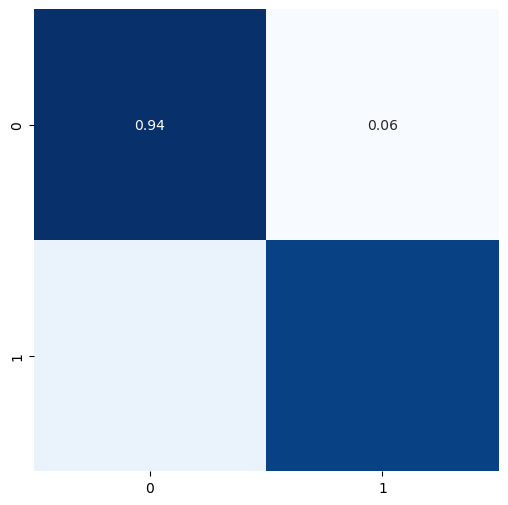

In [ ]:
plot_cm(y_test, y_preds_test)


In [ ]:

print(classification_report(y_test,  y_preds_test, target_names=['Negative', 'Positive']))

              precision    recall  f1-score   support

    Negative       0.89      0.94      0.91      4036
    Positive       0.93      0.88      0.91      4002

    accuracy                           0.91      8038
   macro avg       0.91      0.91      0.91      8038
weighted avg       0.91      0.91      0.91      8038



In [ ]:
with open("transformer.pkl", "wb") as f:
    pickle.dump(tfidf_vectorizer, f)
    
with open("model.pkl", "wb") as f:
    pickle.dump(amodel, f)

In [ ]:
# labels = ['Negative', 'Neutral', 'Positive']
def get_sentiment(review):
    # preprocessing
    x = preprocessor(review)
    #vectorization
    x = tfidf_vectorizer.transform([x])
    #prediction
    y = int(bmodel.predict(x.reshape(1,-1)))
    return labels[y]

In [ ]:
labels = ['Negative', 'Positive']

def get_sentiment(review):
    # vectorization
    x = tfidf_vectorizer.transform([review])
    # prediction
    y = int(amodel.predict(x.reshape(1, -1)))
    return labels[y]


In [ ]:
# positve review
review = "Áo quá tốt"
print(f"This is a {get_sentiment(review)} review!")

This is a Positive review!


In [ ]:
review = "Hàng không đúng như quảng cáo"
print(f"This is a {get_sentiment(review)} review!")

This is a Negative review!
